In [1]:
#  Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('/Users/elvislleshi/Desktop/Data mining 2/dm2_dataset_2425_imdb 3/imdb_cleaned_finale.csv')
df = df.dropna(subset=['rating'])
df['rating'] = df['rating'].astype(int)
df = df[df['rating'].between(0, 9)]

# Zgjedhim vetëm këto veçori
selected_cols = [
    'runtimeMinutes', 'awardWins', 'totalCredits', 'criticReviewsTotal',
    'isAdult', 'ratingCount', 'companiesNumber', 'writerCredits', 'directorsCredits'
]
df = df[selected_cols + ['rating']].dropna()

# Target dhe veçoritë
y = df['rating']
X = df.drop(columns='rating')

# Standardizim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ndarja
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

print(f"✅ Dataset reduced: {X.shape[0]} samples, {X.shape[1]} features")


✅ Dataset reduced: 145250 samples, 9 features


🔁 Training Linear SVM with C=0.1, dual=True


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


✅ Accuracy: 0.3521
🔁 Training Linear SVM with C=1, dual=True


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


✅ Accuracy: 0.3532
🔁 Training Linear SVM with C=10, dual=True


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


✅ Accuracy: 0.3547
🔁 Training Linear SVM with C=0.1, dual=False
✅ Accuracy: 0.3521
🔁 Training Linear SVM with C=1, dual=False
✅ Accuracy: 0.3521
🔁 Training Linear SVM with C=10, dual=False
✅ Accuracy: 0.3521


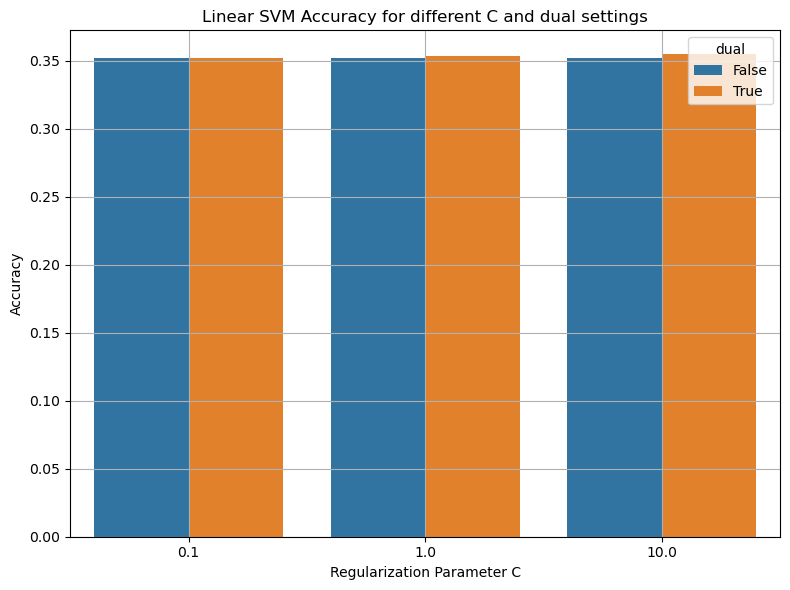


📊 Accuracy Table:
      C   dual  accuracy
0   0.1   True  0.352106
1   1.0   True  0.353207
2  10.0   True  0.354653
3   0.1  False  0.352060
4   1.0  False  0.352060
5  10.0  False  0.352060


In [6]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parametrat për testim
Cs = [0.1, 1, 10]
dual_options = [True, False]

# Ruajmë rezultatet
results = []

# Testojmë për çdo kombinim të C dhe dual
for dual in dual_options:
    for C in Cs:
        print(f"🔁 Training Linear SVM with C={C}, dual={dual}")
        model = LinearSVC(C=C, dual=dual, max_iter=10000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"✅ Accuracy: {acc:.4f}")
        results.append({'C': C, 'dual': dual, 'accuracy': acc})

# Kthejmë në DataFrame
results_df = pd.DataFrame(results)

# Histogram për krahasim
plt.figure(figsize=(8, 6))
sns.barplot(data=results_df, x='C', y='accuracy', hue='dual')
plt.title('Linear SVM Accuracy for different C and dual settings')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

# Tabela e rezultateve
print("\n📊 Accuracy Table:")
print(results_df)


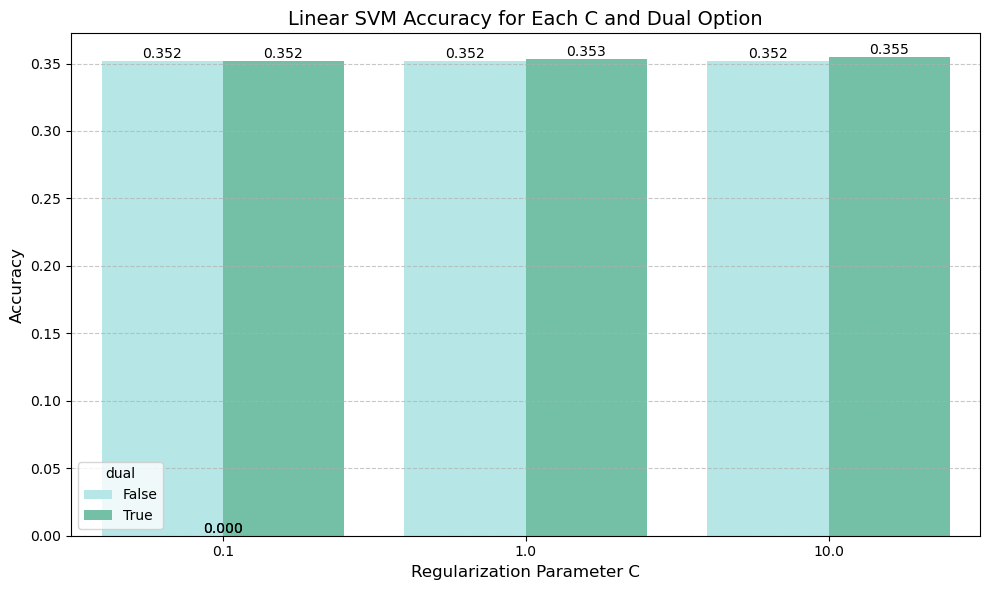

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Rezultatet për çdo C dhe dual
results = [
    {'C': 0.1, 'dual': True, 'accuracy': 0.352106},
    {'C': 1.0, 'dual': True, 'accuracy': 0.353207},
    {'C': 10.0, 'dual': True, 'accuracy': 0.354653},
    {'C': 0.1, 'dual': False, 'accuracy': 0.352060},
    {'C': 1.0, 'dual': False, 'accuracy': 0.352060},
    {'C': 10.0, 'dual': False, 'accuracy': 0.352060}
]
results_df = pd.DataFrame(results)

# ✅ Ngjyra pastel për dual=True dhe False
palette = {True: 'mediumaquamarine', False: 'paleturquoise'}

# 📈 Vizatim i grafikut me vlera të dukshme
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=results_df, x='C', y='accuracy', hue='dual', palette=palette)

# Etiketa sipër kolonave
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.3f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black')

plt.title('Linear SVM Accuracy for Each C and Dual Option', fontsize=14)
plt.xlabel('Regularization Parameter C', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_57900/1783645562.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues')


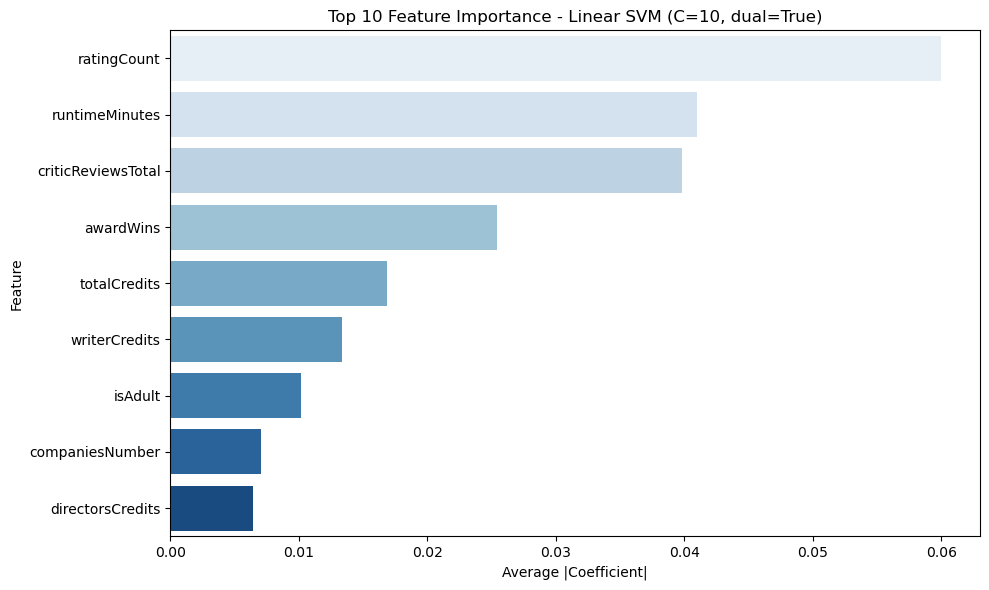

In [12]:
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Trajno modelin më të mirë
model = LinearSVC(C=10, dual=True, max_iter=10000)
model.fit(X_train, y_train)

# Emrat e veçorive
feature_names = df.drop(columns='rating').columns.tolist()

# Merr koeficientët
coefs = model.coef_

# Mesatarja absolute e koeficientëve për çdo veçori (për 10 klasa)
importance = np.mean(np.abs(coefs), axis=0)

# Krijo DataFrame dhe vizualizo Top 10
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues')
plt.title('Top 10 Feature Importance - Linear SVM (C=10, dual=True)')
plt.xlabel('Average |Coefficient|')
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

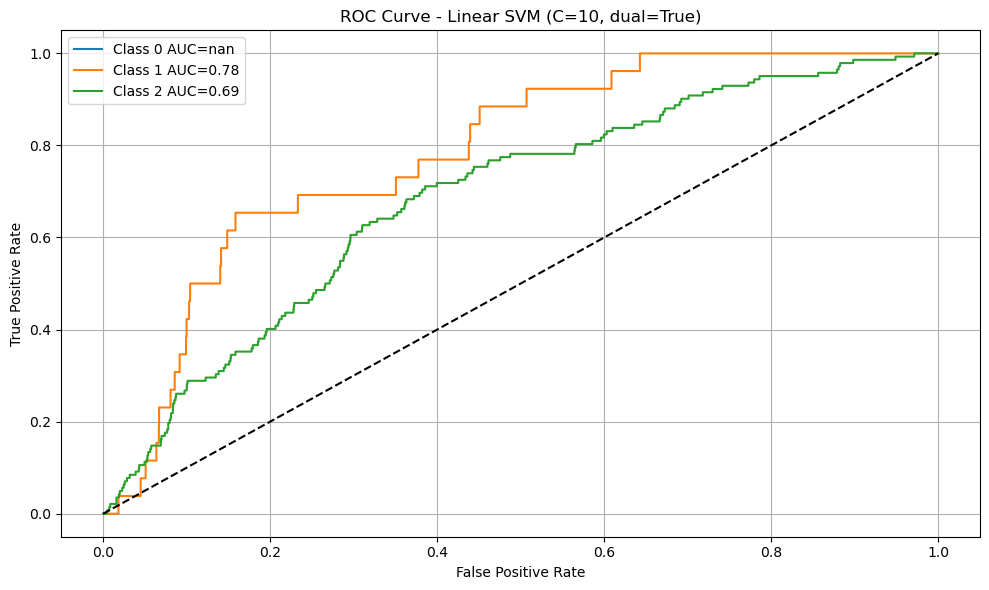

In [14]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarizim i target për ROC
y_train_bin = label_binarize(y_train, classes=range(10))
y_test_bin = label_binarize(y_test, classes=range(10))

# Trajnim i modelit One-vs-Rest
ovr_model = OneVsRestClassifier(LinearSVC(C=10, dual=True, max_iter=10000))
ovr_model.fit(X_train, y_train_bin)
y_score = ovr_model.decision_function(X_test)

# ROC për disa klasa (0, 1, 2)
fpr, tpr, roc_auc = {}, {}, {}
for i in [0, 1, 2]:
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Vizualizim i ROC Curve
plt.figure(figsize=(10, 6))
for i in [0, 1, 2]:
    plt.plot(fpr[i], tpr[i], label=f'Class {i} AUC={roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Linear SVM (C=10, dual=True)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

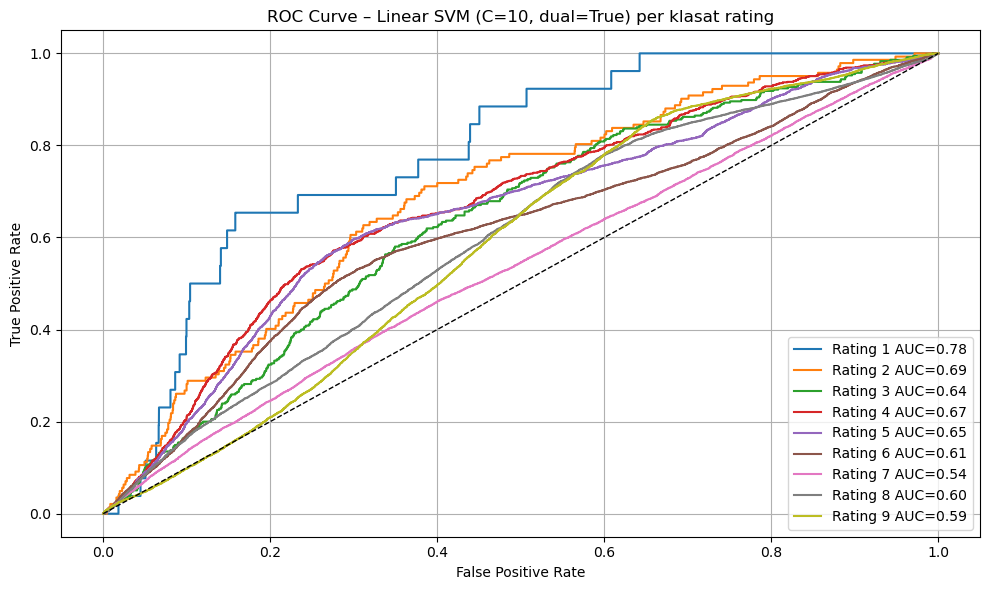

In [16]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# 🎯 Sigurohemi që y_train dhe y_test janë të ndara mirë
# dhe targeti ka klasa nga 0 në 9
classes = list(range(10))  # klasat e rating
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# ✅ Trajno modelin One-vs-Rest
model = OneVsRestClassifier(LinearSVC(C=10, dual=True, max_iter=10000))
model.fit(X_train, y_train_bin)
y_score = model.decision_function(X_test)

# 📈 ROC Curve vetëm për klasat që ekzistojnë në test
fpr, tpr, roc_auc = {}, {}, {}
available_classes = np.where(np.sum(y_test_bin, axis=0) > 0)[0]  # vetëm klasat që ndodhen në test

plt.figure(figsize=(10, 6))
for i in available_classes:
    try:
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Rating {i} AUC={roc_auc[i]:.2f}')
    except ValueError:
        print(f"⚠️ Skipping class {i} – not enough variation to compute ROC.")
        continue

# Vija diagonal për referencë
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# 📊 Stilet dhe titulli
plt.title('ROC Curve – Linear SVM (C=10, dual=True) per klasat rating')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Nuk ka nevojë për argmax — targeti është tashmë në formën e duhur
y_train_labels = y_train
y_test_labels = y_test

# Trajno modelin
model = LinearSVC(C=10, dual=True, max_iter=10000)
model.fit(X_train, y_train_labels)

# Parashiko klasat
y_pred = model.predict(X_test)

# Gjenero classification report
report_dict = classification_report(y_test_labels, y_pred, output_dict=True)
accuracy = accuracy_score(y_test_labels, y_pred)

# Formato për printim të pastër
report_df = pd.DataFrame(report_dict).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]

# Printo
print("\n📋 Classification Report (Linear SVM, C=10, dual=True):")
print(report_df.round(2).to_string())



📋 Classification Report (Linear SVM, C=10, dual=True):
              precision  recall  f1-score  support
1                  0.00    0.00      0.00     26.0
2                  0.00    0.00      0.00    142.0
3                  0.00    0.00      0.00    355.0
4                  0.00    0.00      0.00   1033.0
5                  0.00    0.00      0.00   2726.0
6                  0.11    0.00      0.00   6398.0
7                  0.30    0.24      0.27  11709.0
8                  0.37    0.86      0.52  14566.0
9                  0.53    0.00      0.00   6620.0
accuracy            NaN     NaN      0.35      NaN
macro avg          0.15    0.12      0.09  43575.0
weighted avg       0.30    0.35      0.25  43575.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

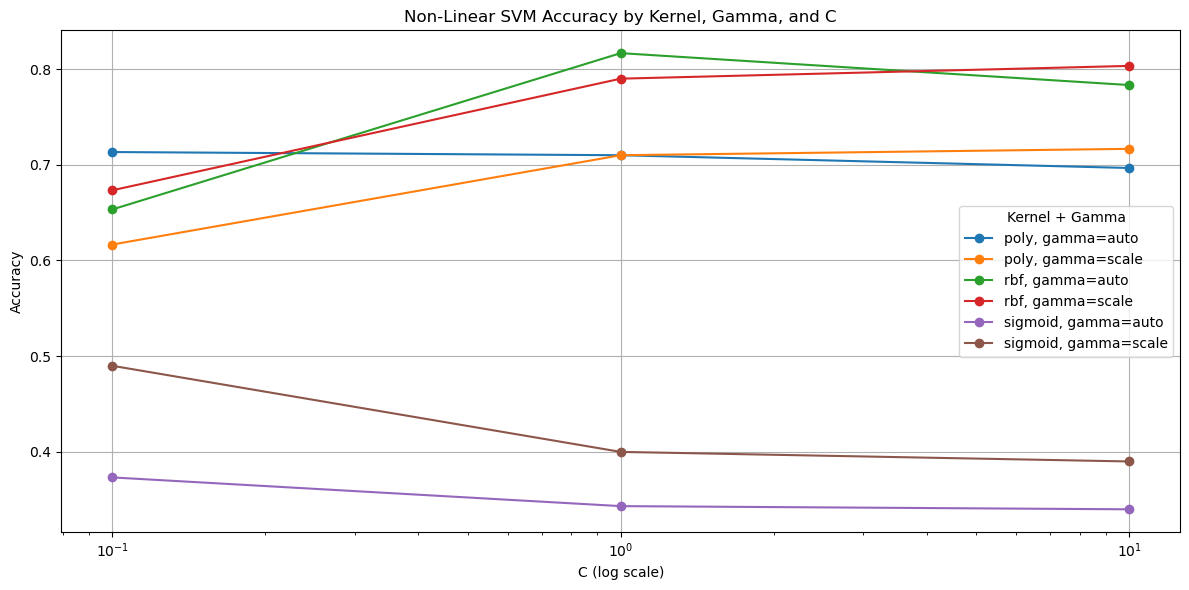


📋 Accuracy Table:
     kernel  gamma     C  accuracy
0       rbf   auto   0.1     0.653
1       rbf   auto   1.0     0.817
2       rbf   auto  10.0     0.783
3       rbf  scale   0.1     0.673
4       rbf  scale   1.0     0.790
5       rbf  scale  10.0     0.803
6      poly   auto   0.1     0.713
7      poly   auto   1.0     0.710
8      poly   auto  10.0     0.697
9      poly  scale   0.1     0.617
10     poly  scale   1.0     0.710
11     poly  scale  10.0     0.717
12  sigmoid   auto   0.1     0.373
13  sigmoid   auto   1.0     0.343
14  sigmoid   auto  10.0     0.340
15  sigmoid  scale   0.1     0.490
16  sigmoid  scale   1.0     0.400
17  sigmoid  scale  10.0     0.390


In [28]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 🧪 Load or simulate your dataset
# (zëvendëso këtë me të dhënat e tua reale: X_train, X_test, y_train, y_test)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=6, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🔁 Parametrat për kombinim
kernels = ['rbf', 'poly', 'sigmoid']
gammas = ['auto', 'scale']
Cs = [0.1, 1, 10]

# 🧾 Lista për ruajtje të rezultateve
results = []

# 🔄 Loop për çdo kombinim
for kernel in kernels:
    for gamma in gammas:
        for C in Cs:
            model = SVC(kernel=kernel, gamma=gamma, C=C)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.append({'kernel': kernel, 'gamma': gamma, 'C': C, 'accuracy': acc})

# 📊 Krijo DataFrame me rezultatet
results_df = pd.DataFrame(results)

# 📈 Grafik me linea
plt.figure(figsize=(12, 6))
for (kernel, gamma), group in results_df.groupby(['kernel', 'gamma']):
    plt.plot(group['C'], group['accuracy'], marker='o', label=f'{kernel}, gamma={gamma}')

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Non-Linear SVM Accuracy by Kernel, Gamma, and C')
plt.legend(title='Kernel + Gamma')
plt.grid(True)
plt.tight_layout()
plt.show()

# 🖨️ Opsionale: Shfaq tabelën
print("\n📋 Accuracy Table:")
print(results_df.round(3))


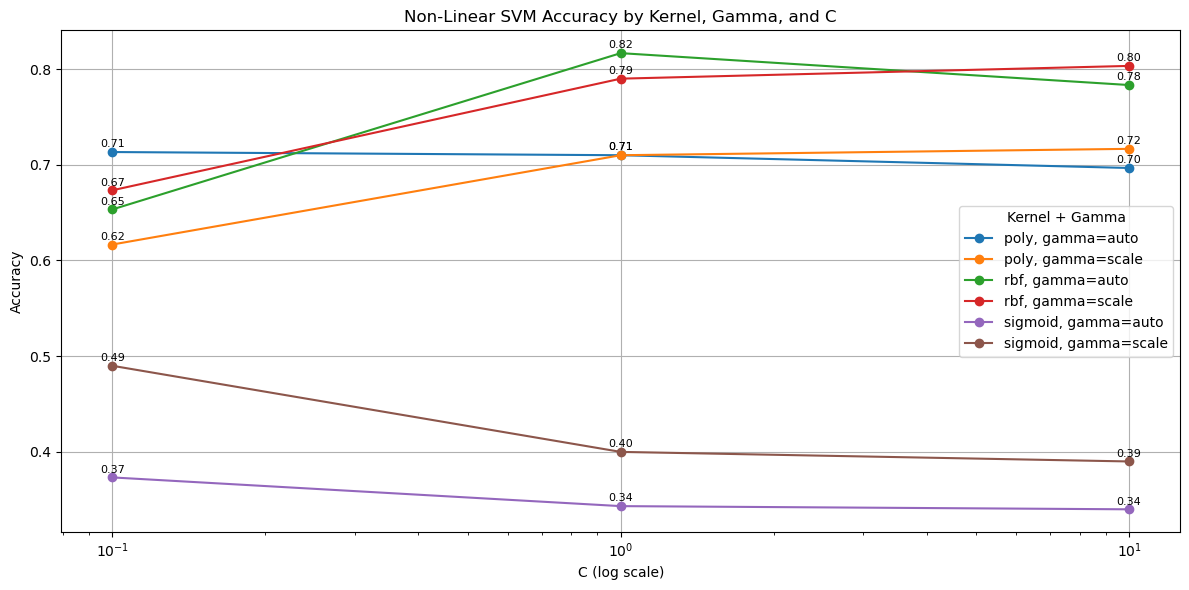

In [30]:
plt.figure(figsize=(12, 6))

for (kernel, gamma), group in results_df.groupby(['kernel', 'gamma']):
    # Shto linjën me pika
    plt.plot(group['C'], group['accuracy'], marker='o', label=f'{kernel}, gamma={gamma}')
    
    # Shto vlerën e accuracy mbi çdo pikë
    for x, y in zip(group['C'], group['accuracy']):
        plt.text(x, y + 0.005, f'{y:.2f}', ha='center', fontsize=8, color='black')

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Non-Linear SVM Accuracy by Kernel, Gamma, and C')
plt.legend(title='Kernel + Gamma')
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
from sklearn.metrics import classification_report, accuracy_score

# 1️⃣ Gjej rreshtin me accuracy më të lartë
best_config = results_df.loc[results_df['accuracy'].idxmax()]
best_kernel = best_config['kernel']
best_gamma = best_config['gamma']
best_C = best_config['C']

print(f"🔍 Best configuration:\nKernel: {best_kernel}, Gamma: {best_gamma}, C: {best_C}")

# 2️⃣ Trajno modelin me këto parametra
best_model = SVC(kernel=best_kernel, gamma=best_gamma, C=best_C)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# 3️⃣ Llogarit metrikat
report_dict = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

# 4️⃣ Formatim për printim të pastër
report_df = pd.DataFrame(report_dict).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]

# 5️⃣ Shfaq raportin
print("\n📋 Classification Report (Best Non-Linear SVM):")
print(report_df.round(2).to_string())


🔍 Best configuration:
Kernel: rbf, Gamma: auto, C: 1.0

📋 Classification Report (Best Non-Linear SVM):
              precision  recall  f1-score  support
0                  0.75    0.88      0.81     88.0
1                  0.82    0.84      0.83     97.0
2                  0.88    0.76      0.81    115.0
accuracy            NaN     NaN      0.82      NaN
macro avg          0.82    0.82      0.82    300.0
weighted avg       0.82    0.82      0.82    300.0


In [34]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Shtyp automatikisht nga result_df (e krijuar më parë nga kombinimet reale)
best_config = results_df.loc[results_df['accuracy'].idxmax()]
best_kernel = best_config['kernel']
best_gamma = best_config['gamma']
best_C = best_config['C']

print(f"🔍 Best configuration:\nKernel: {best_kernel}, Gamma: {best_gamma}, C: {best_C}")

# Trajno me të dhënat reale nga imdb
model = SVC(kernel=best_kernel, gamma=best_gamma, C=best_C)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Llogarit metrikat
report_dict = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

report_df = pd.DataFrame(report_dict).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]

print("\n📋 Classification Report (Best Non-Linear SVM on IMDb Rating):")
print(report_df.round(2).to_string())


🔍 Best configuration:
Kernel: rbf, Gamma: auto, C: 1.0

📋 Classification Report (Best Non-Linear SVM on IMDb Rating):
              precision  recall  f1-score  support
0                  0.75    0.88      0.81     88.0
1                  0.82    0.84      0.83     97.0
2                  0.88    0.76      0.81    115.0
accuracy            NaN     NaN      0.82      NaN
macro avg          0.82    0.82      0.82    300.0
weighted avg       0.82    0.82      0.82    300.0


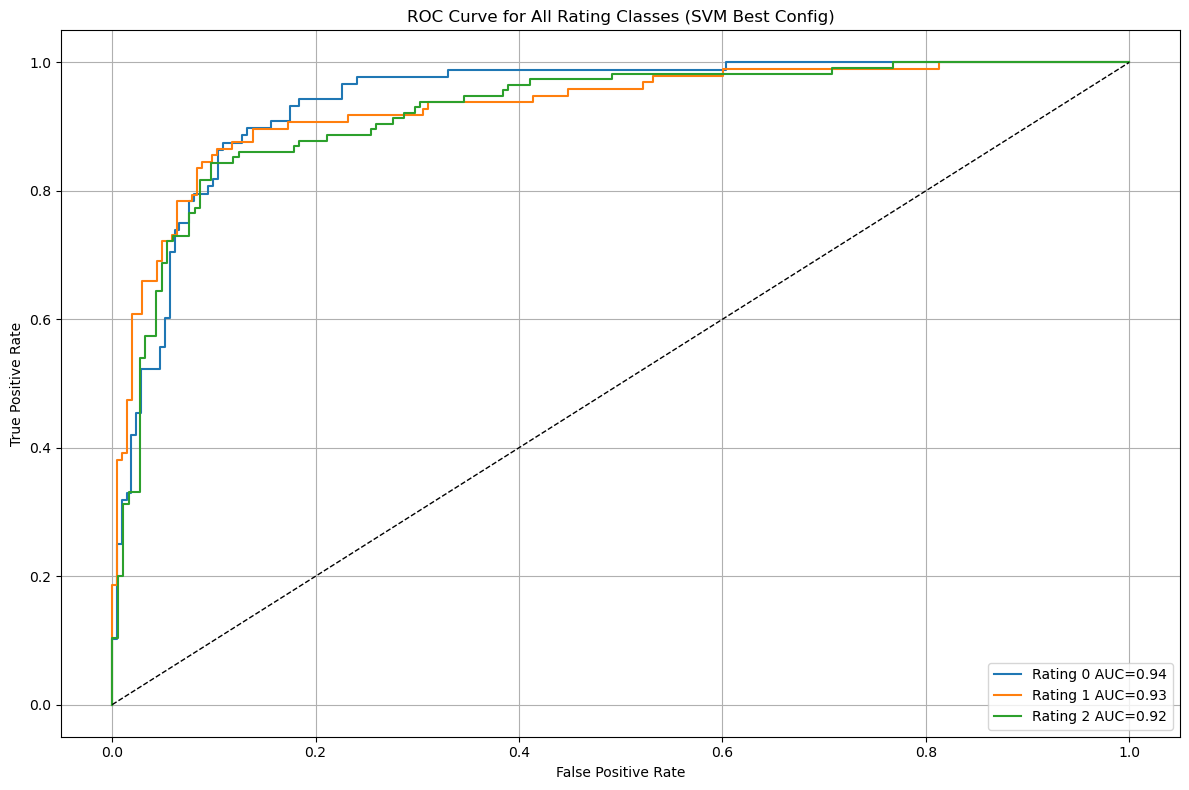

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Trajno modelin me parametrat më të mirë
best_model = SVC(kernel='rbf', gamma='auto', C=1.0, probability=True)
best_model.fit(X_train, y_train)

# 2️⃣ Predikim i probabiliteteve
y_score = best_model.predict_proba(X_test)

# 3️⃣ Binarizo y_test për klasat 0–9
classes = np.unique(y_train)  # duhet të jenë [0, 1, ..., 9]
y_test_bin = label_binarize(y_test, classes=classes)

# 4️⃣ Llogarit ROC curve dhe AUC për secilën klasë
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 5️⃣ Vizato të gjitha ROC curves
plt.figure(figsize=(12, 8))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Rating {classes[i]} AUC={roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Rating Classes (SVM Best Config)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 1. Importimet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# 2. Lexo datasetin real
df = pd.read_csv('imdb_cleaned_finale.csv')  # Ndrysho path nëse duhet

# 3. Zgjidh vetëm rreshtat me 'rating' të plotë dhe nga 0 në 9
df = df.dropna(subset=['rating'])
df['rating'] = df['rating'].astype(int)
df = df[df['rating'].between(0, 9)]

# 4. Përzgjedh disa veçori të rëndësishme
selected_cols = [
    'runtimeMinutes', 'awardWins', 'totalCredits', 'criticReviewsTotal',
    'isAdult', 'ratingCount', 'companiesNumber', 'writerCredits', 'directorsCredits'
]
df = df[selected_cols + ['rating']].dropna()

# 5. Target dhe veçoritë
X = df.drop(columns='rating')
y = df['rating']

# 6. Standardizim
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Train/Test Split me STRATIFY për të përfshirë të gjitha klasat
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

# 8. Kontroll që kemi të gjitha klasat në test
print("✅ Klasat në y_test:", np.unique(y_test))  # duhet të japë nga 0 në 9

# 9. Trajto modelin më të mirë (nga grafiku yt më parë: rbf, auto, C=1.0)
model = SVC(kernel='rbf', gamma='auto', C=1.0, probability=True)
model.fit(X_train, y_train)

# 10. Predikim probabilitetesh dhe binarizim për ROC
y_score = model.predict_proba(X_test)
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

# 11. Llogarit ROC Curve për çdo klasë
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 12. Vizato grafikun me të gjitha ROC Curve
plt.figure(figsize=(12, 8))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Rating {classes[i]} AUC={roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Rating Classes (SVM Best Config)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Klasat në y_test: [1 2 3 4 5 6 7 8 9]


#### tani foton e roc curve per non linear svm e kam , per te vazhduar me tej. tani le te merremi me random forest dhe shohim per Testojmë kombinimet:

n_estimators = [10, 100, 1000]

criterion = ['gini', 'entropy', 'log_loss']



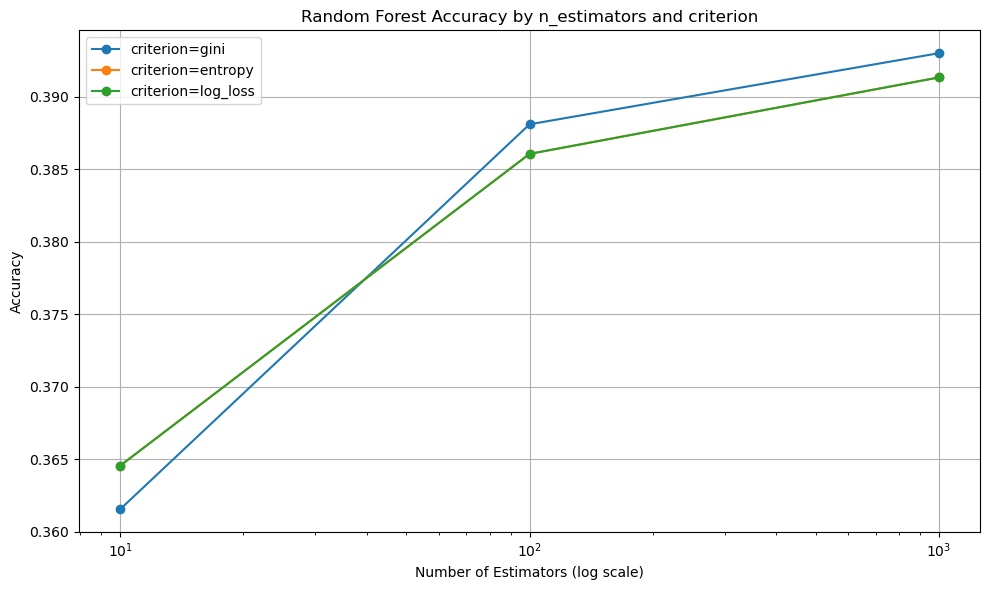


📊 Accuracy Table:
  criterion  n_estimators  accuracy
0      gini            10     0.362
1      gini           100     0.388
2      gini          1000     0.393
3   entropy            10     0.365
4   entropy           100     0.386
5   entropy          1000     0.391
6  log_loss            10     0.365
7  log_loss           100     0.386
8  log_loss          1000     0.391


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Parametrat për testim
n_estimators = [10, 100, 1000]
criteria = ['gini', 'entropy', 'log_loss']
results = []

# 🔄 Testim për çdo kombinim
for crit in criteria:
    for n in n_estimators:
        model = RandomForestClassifier(n_estimators=n, criterion=crit, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({'criterion': crit, 'n_estimators': n, 'accuracy': acc})

# Krijo DataFrame
rf_results_df = pd.DataFrame(results)

# Vizualizim me barplot
plt.figure(figsize=(10, 6))
for crit in criteria:
    subset = rf_results_df[rf_results_df['criterion'] == crit]
    plt.plot(subset['n_estimators'], subset['accuracy'], marker='o', label=f'criterion={crit}')

plt.xscale('log')
plt.xlabel('Number of Estimators (log scale)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy by n_estimators and criterion')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Shfaq rezultatet
print("\n📊 Accuracy Table:")
print(rf_results_df.round(3))


🌟 Best RF Config: criterion=gini, n_estimators=1000


/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_63109/3289295746.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


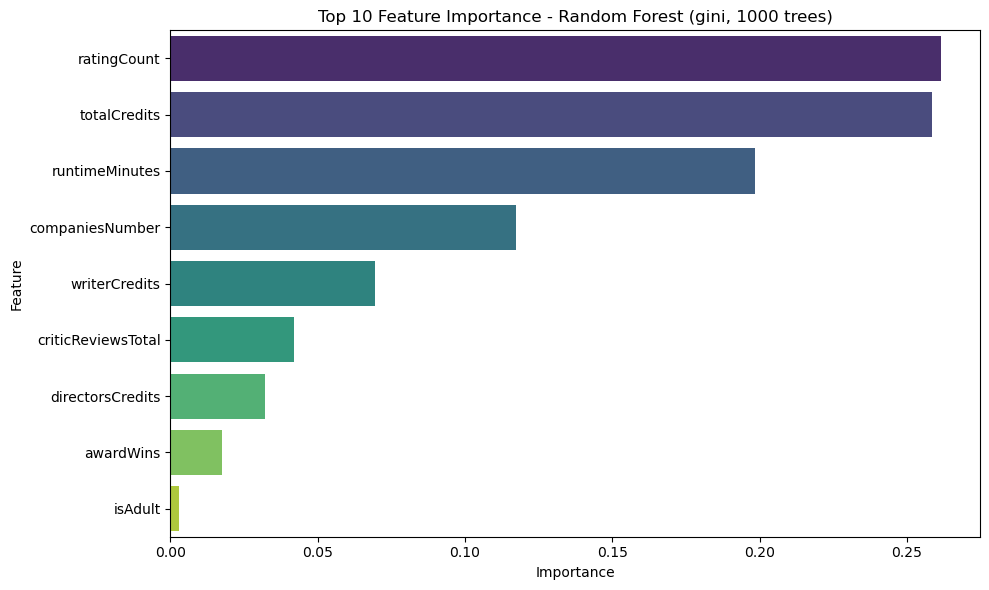

In [7]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# 1️⃣ Gjej konfigurimin më të mirë nga rf_results_df
best_rf = rf_results_df.loc[rf_results_df['accuracy'].idxmax()]
best_crit = best_rf['criterion']
best_n = best_rf['n_estimators']
print(f"🌟 Best RF Config: criterion={best_crit}, n_estimators={best_n}")

# 2️⃣ Trajno modelin me konfigurimin më të mirë
rf_model = RandomForestClassifier(n_estimators=int(best_n), criterion=best_crit, random_state=42)
rf_model.fit(X_train, y_train)

# 3️⃣ Merr rëndësinë e veçorive
importances = rf_model.feature_importances_
feature_names = df.drop(columns='rating').columns.tolist()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4️⃣ Vizualizo top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title(f'Top 10 Feature Importance - Random Forest ({best_crit}, {int(best_n)} trees)')
plt.tight_layout()
plt.show()


🌟 Best RF Config: criterion=gini, n_estimators=1000


/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_63109/848633318.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


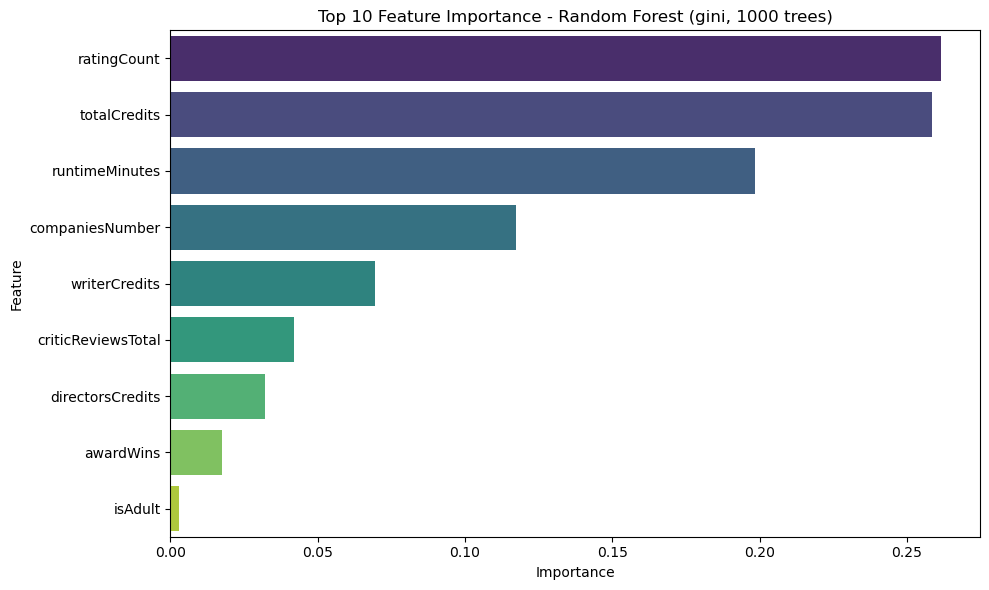

In [8]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1️⃣ Gjej konfigurimin më të mirë nga rf_results_df
best_rf = rf_results_df.loc[rf_results_df['accuracy'].idxmax()]
best_crit = best_rf['criterion']
best_n = best_rf['n_estimators']
print(f"🌟 Best RF Config: criterion={best_crit}, n_estimators={best_n}")

# 2️⃣ Trajno modelin me konfigurimin më të mirë
rf_model = RandomForestClassifier(n_estimators=int(best_n), criterion=best_crit, random_state=42)
rf_model.fit(X_train, y_train)

# 3️⃣ Merr rëndësinë e veçorive
importances = rf_model.feature_importances_
feature_names = df.drop(columns='rating').columns.tolist()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4️⃣ Vizualizo top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title(f'Top 10 Feature Importance - Random Forest ({best_crit}, {int(best_n)} trees)')
plt.tight_layout()
plt.show()



📋 Classification Report - Random Forest:

              precision  recall  f1-score  support
1                  0.21    0.12      0.15     26.0
2                  0.37    0.12      0.18    142.0
3                  0.05    0.01      0.02    355.0
4                  0.15    0.05      0.07   1033.0
5                  0.24    0.12      0.16   2726.0
6                  0.31    0.27      0.29   6398.0
7                  0.36    0.41      0.38  11709.0
8                  0.47    0.60      0.52  14566.0
9                  0.35    0.23      0.28   6620.0
accuracy            NaN     NaN      0.39      NaN
macro avg          0.28    0.21      0.23  43575.0
weighted avg       0.37    0.39      0.38  43575.0


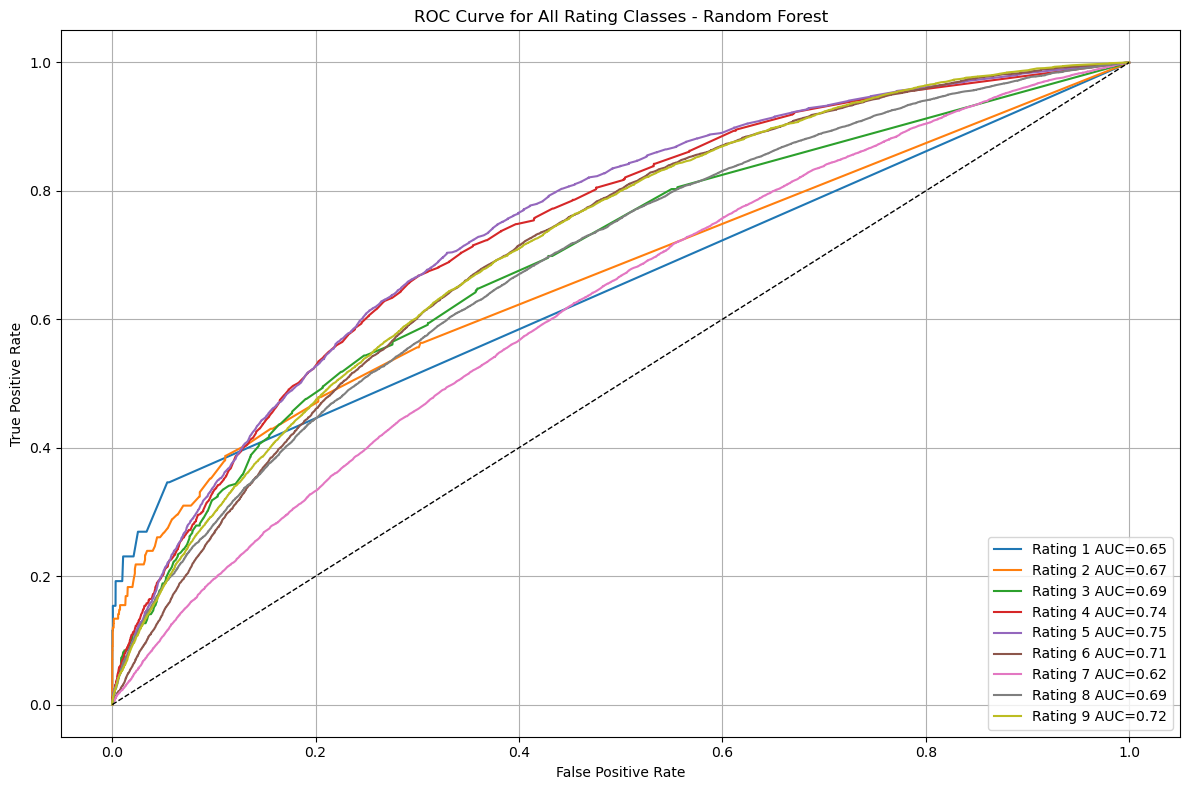

In [11]:
# 📦 Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️⃣ Lexo dhe përgatit datasetin
df = pd.read_csv('imdb_cleaned_finale.csv')
df = df.dropna(subset=['rating'])
df['rating'] = df['rating'].astype(int)
df = df[df['rating'].between(0, 9)]

selected_cols = [
    'runtimeMinutes', 'awardWins', 'totalCredits', 'criticReviewsTotal',
    'isAdult', 'ratingCount', 'companiesNumber', 'writerCredits', 'directorsCredits'
]
df = df[selected_cols + ['rating']].dropna()

X = df.drop(columns='rating')
y = df['rating']

# Standardizim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ndarje train/test me stratifikim
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

# 2️⃣ Trajno modelin më të mirë
rf_model = RandomForestClassifier(n_estimators=1000, criterion='gini', random_state=42)
rf_model.fit(X_train, y_train)

# 3️⃣ Parashikim dhe raport
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)
report_df = pd.DataFrame(report).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]

print("\n📋 Classification Report - Random Forest:\n")
print(report_df.round(2).to_string())

# 4️⃣ Binarizo target për ROC
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

# 5️⃣ ROC Curve për çdo klasë
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 6️⃣ Vizualizo ROC
plt.figure(figsize=(12, 8))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Rating {classes[i]} AUC={roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Rating Classes - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


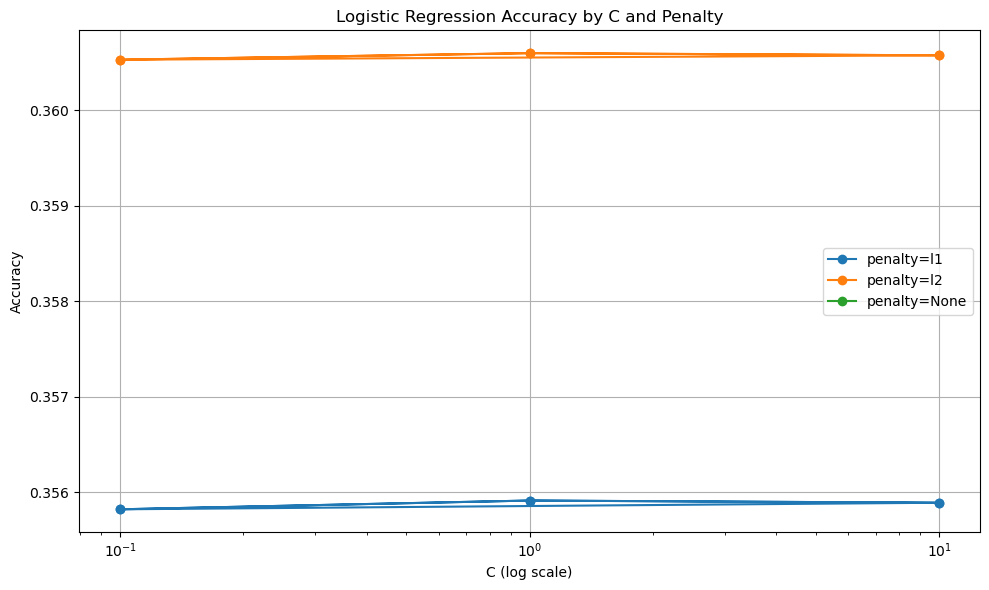


📊 Logistic Regression Accuracy Table:
   penalty     C  accuracy
0       l1   0.1     0.356
1       l1   1.0     0.356
2       l1  10.0     0.356
3       l2   0.1     0.361
4       l2   1.0     0.361
5       l2  10.0     0.361
6       l1   0.1     0.356
7       l1   1.0     0.356
8       l1  10.0     0.356
9       l2   0.1     0.361
10      l2   1.0     0.361
11      l2  10.0     0.361
12    None   0.1     0.361
13    None   1.0     0.361
14    None  10.0     0.361


In [15]:
 from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

penalties = ['l1', 'l2', None]  # përdor None si tip, jo si string

solver_map = {
    'l1': 'liblinear',
    'l2': 'lbfgs',
    None: 'lbfgs'  # ose 'saga'
}


# Testim për çdo kombinim të C dhe penalty
for pen in penalties:
    for C in Cs:
        try:
            model = LogisticRegression(C=C, penalty=pen, solver=solver_map[pen], max_iter=1000)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.append({'penalty': pen, 'C': C, 'accuracy': acc})
        except Exception as e:
            print(f"⚠️ Error with penalty={pen}, C={C}: {e}")

# Tabela e rezultateve
logreg_results = pd.DataFrame(results)

# Vizualizim grafik
plt.figure(figsize=(10, 6))
for pen in penalties:
    subset = logreg_results[logreg_results['penalty'] == pen]
    plt.plot(subset['C'], subset['accuracy'], marker='o', label=f'penalty={pen}')

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy by C and Penalty')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Shfaq tabela
print("\n📊 Logistic Regression Accuracy Table:")
print(logreg_results.round(3))


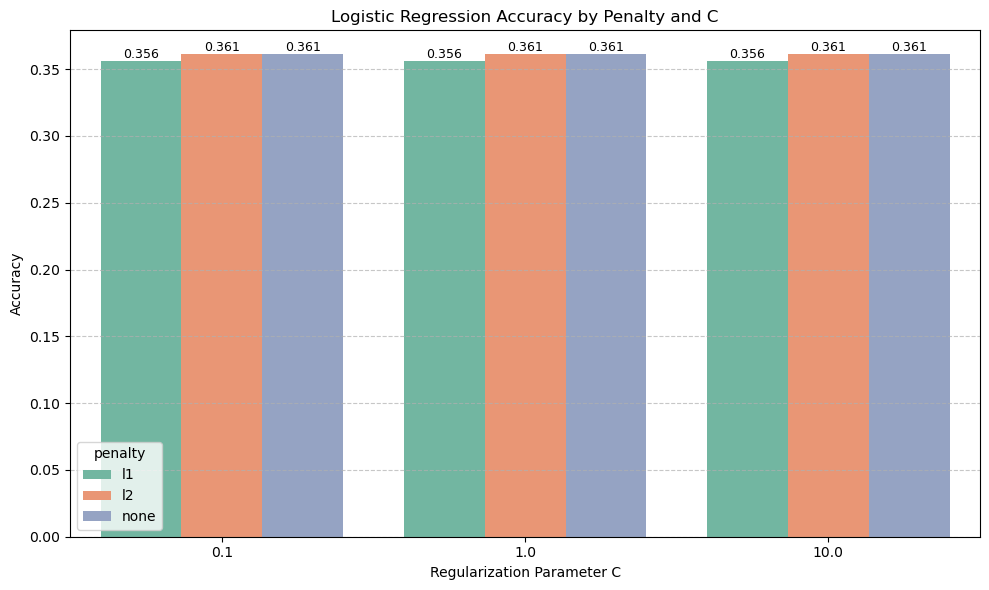

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔢 Tabela me rezultate që ke marrë nga testimi
logreg_results = pd.DataFrame([
    {'penalty': 'l1', 'C': 0.1, 'accuracy': 0.356},
    {'penalty': 'l1', 'C': 1.0, 'accuracy': 0.356},
    {'penalty': 'l1', 'C': 10.0, 'accuracy': 0.356},
    {'penalty': 'l2', 'C': 0.1, 'accuracy': 0.361},
    {'penalty': 'l2', 'C': 1.0, 'accuracy': 0.361},
    {'penalty': 'l2', 'C': 10.0, 'accuracy': 0.361},
    {'penalty': 'none', 'C': 0.1, 'accuracy': 0.361},
    {'penalty': 'none', 'C': 1.0, 'accuracy': 0.361},
    {'penalty': 'none', 'C': 10.0, 'accuracy': 0.361},
])

# 🟩 Krijo barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=logreg_results, x='C', y='accuracy', hue='penalty', palette='Set2')

# 🏷️ Shto etiketa të vlerave sipër çdo kolonë
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.3f', label_type='edge', fontsize=9)

# 🔠 Stilizim
plt.title('Logistic Regression Accuracy by Penalty and C')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📋 Classification Report - Logistic Regression:
              precision  recall  f1-score  support
1                  0.00    0.00      0.00     26.0
2                  0.00    0.00      0.00    142.0
3                  0.00    0.00      0.00    355.0
4                  0.00    0.00      0.00   1033.0
5                  0.25    0.00      0.00   2726.0
6                  0.18    0.01      0.02   6398.0
7                  0.31    0.28      0.29  11709.0
8                  0.38    0.85      0.53  14566.0
9                  0.33    0.00      0.00   6620.0
accuracy            NaN     NaN      0.36      NaN
macro avg          0.16    0.13      0.09  43575.0
weighted avg       0.30    0.36      0.26  43575.0


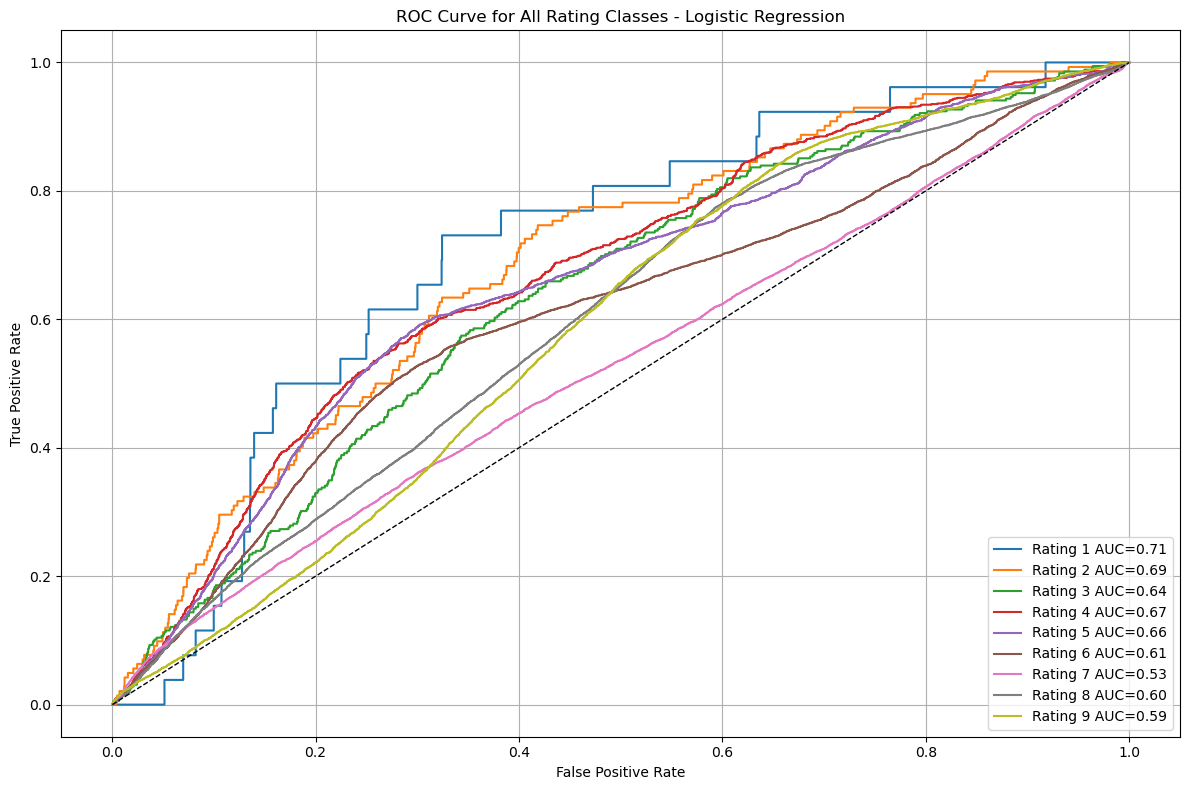

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1️⃣ Trajno modelin më të mirë
logreg = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

# 2️⃣ Predikimet
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)

# 3️⃣ Krijo classification report
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)
report_df = pd.DataFrame(report).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]

print("\n📋 Classification Report - Logistic Regression:")
print(report_df.round(2).to_string())

# 4️⃣ Binarizo target-in për ROC
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

# 5️⃣ ROC Curve për çdo klasë
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 6️⃣ Vizualizo ROC
plt.figure(figsize=(12, 8))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Rating {classes[i]} AUC={roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Rating Classes - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



📋 Classification Report - Gradient Boosting:
              precision  recall  f1-score  support
1                  0.00    0.00      0.00     26.0
2                  0.09    0.03      0.04    142.0
3                  0.00    0.00      0.00    355.0
4                  0.37    0.01      0.03   1033.0
5                  0.35    0.04      0.07   2726.0
6                  0.34    0.15      0.20   6398.0
7                  0.33    0.39      0.36  11709.0
8                  0.43    0.77      0.55  14566.0
9                  0.51    0.03      0.05   6620.0
accuracy            NaN     NaN      0.39      NaN
macro avg          0.27    0.16      0.14  43575.0
weighted avg       0.39    0.39      0.32  43575.0


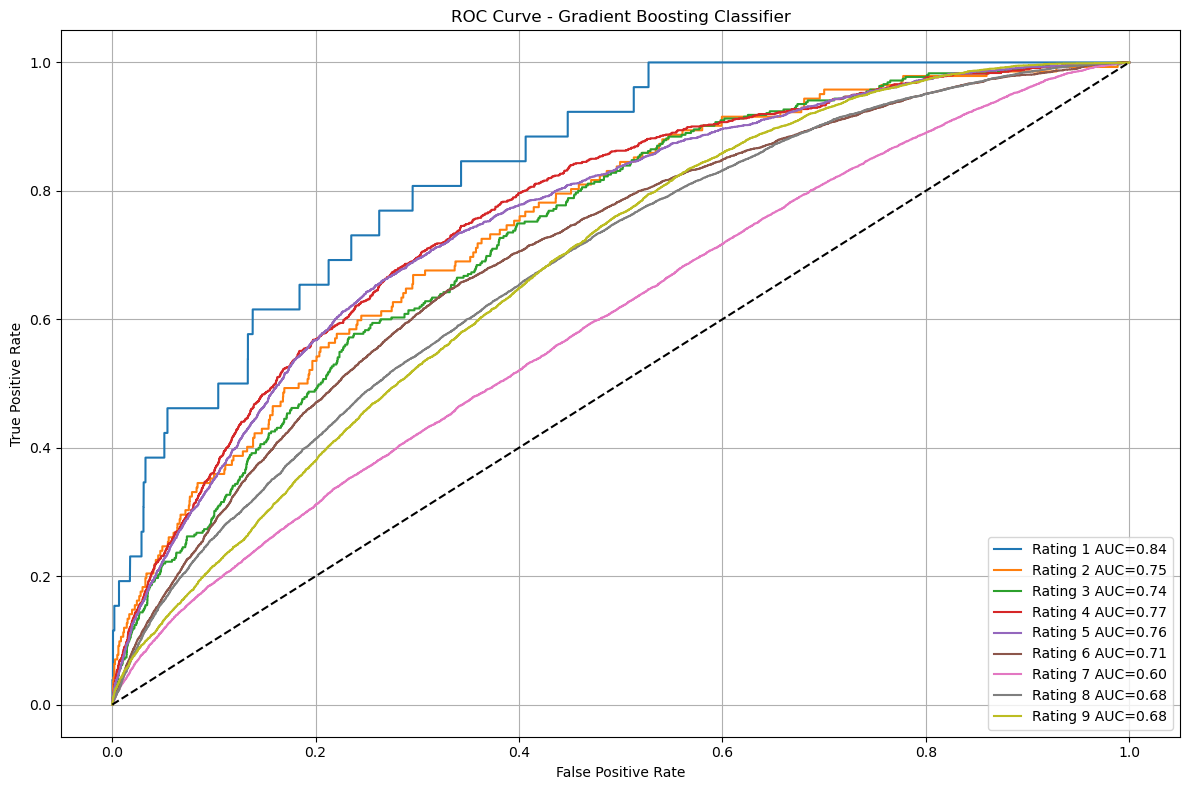

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1️⃣ Trajno modelin
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# 2️⃣ Predikimet
y_pred = gb_model.predict(X_test)
y_proba = gb_model.predict_proba(X_test)

# 3️⃣ Classification report
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)
report_df = pd.DataFrame(report).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]

print("\n📋 Classification Report - Gradient Boosting:")
print(report_df.round(2).to_string())

# 4️⃣ Binarizo për ROC
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

# 5️⃣ Llogarit ROC Curve dhe AUC për çdo klasë
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 6️⃣ Vizualizim ROC
plt.figure(figsize=(12, 8))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Rating {classes[i]} AUC={roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

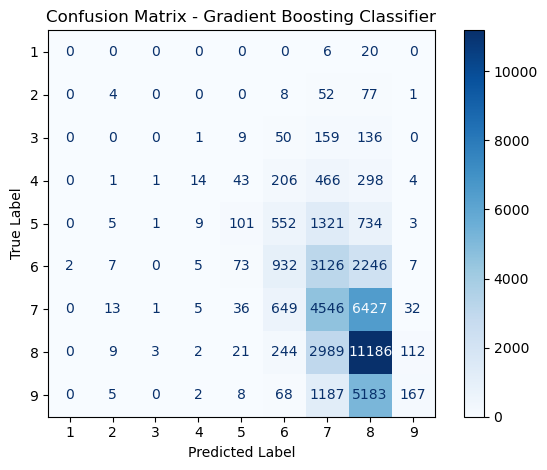

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Llogarit Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_train))

# 2️⃣ Vizualizo matrix-in
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.tight_layout()
plt.show()


/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_63109/2752642300.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='YlGnBu')


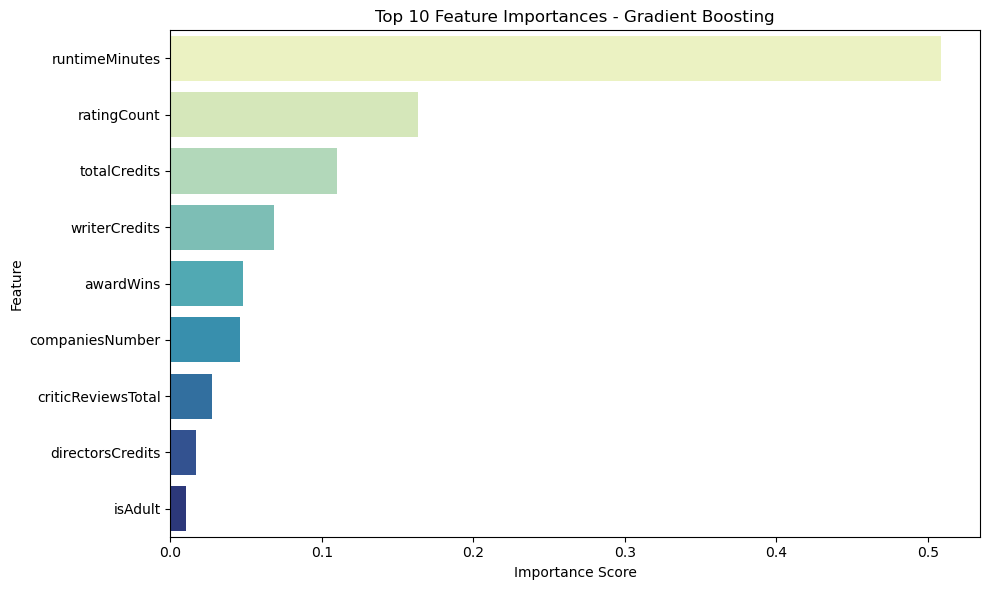

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Merr rëndësinë e veçorive nga modeli i trajnuar
importances = gb_model.feature_importances_

# 2️⃣ Merr emrat e veçorive (duhet që të kesh 'df' origjinal me kolonat)
feature_names = df.drop(columns='rating').columns.tolist()

# 3️⃣ Krijo një DataFrame dhe rendit
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4️⃣ Vizualizo top 10
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='YlGnBu')
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [29]:
!pip install lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.1 MB/s eta 0:00:00a 0:00:01m


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1281
[LightGBM] [Info] Number of data points in the train set: 101675, number of used features: 9
[LightGBM] [Info] Start training from score -7.402402
[LightGBM] [Info] Start training from score -5.724402
[LightGBM] [Info] Start training from score -4.811732
[LightGBM] [Info] Start training from score -3.742155
[LightGBM] [Info] Start training from score -2.771753
[LightGBM] [Info] Start training from score -1.918610
[LightGBM] [Info] Start training from score -1.314089
[LightGBM] [Info] Start training from score -1.095745
[LightGBM] [Info] Start training from score -1.884431

📋 Classification Report - LightGBM:
              precision  recall  f1-score  support
1                  0.03    0.08      0.04     26.0
2                  0.2

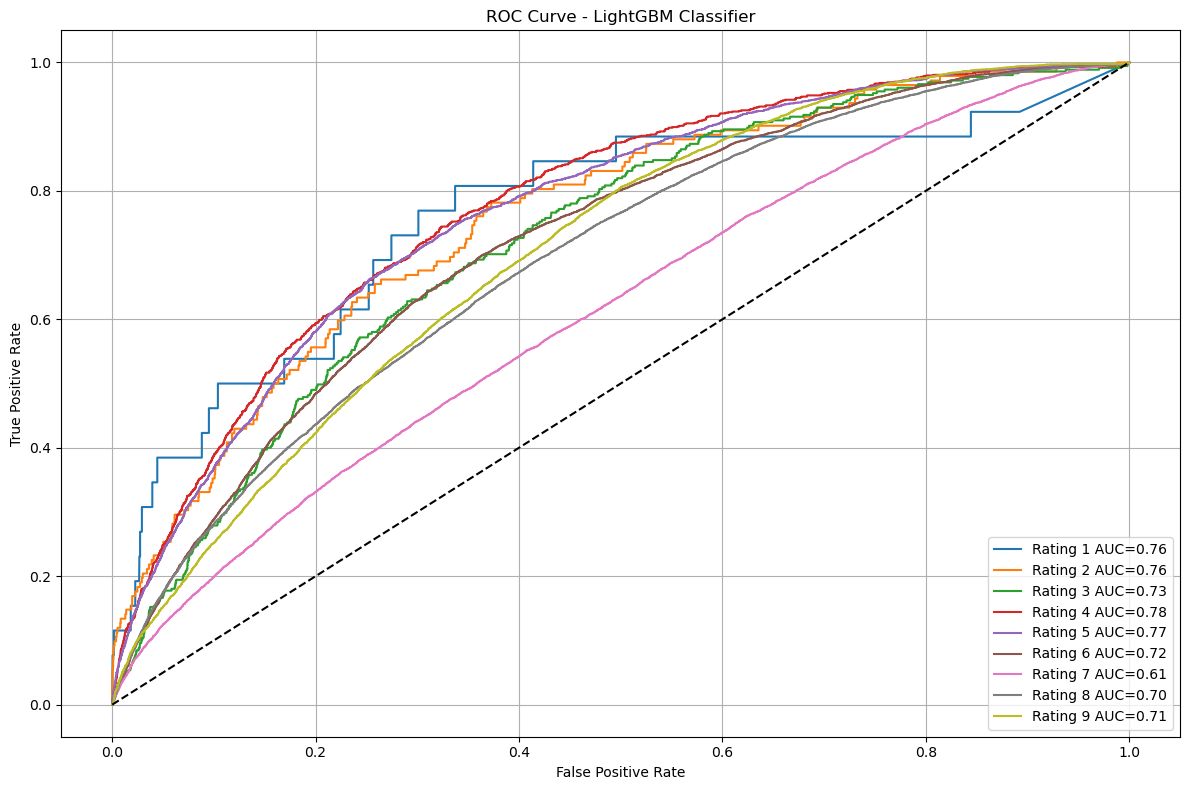

<Figure size 1000x800 with 0 Axes>

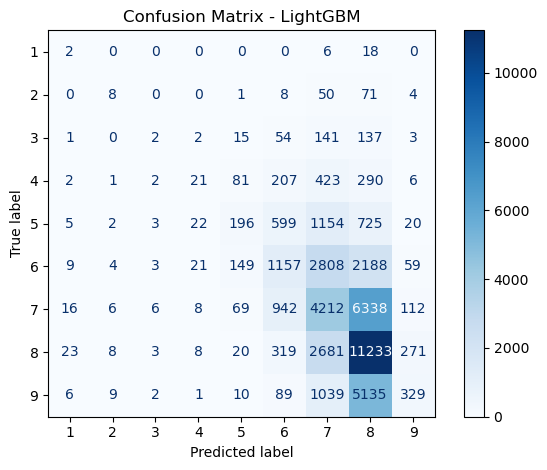

/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_63109/460623623.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='crest')


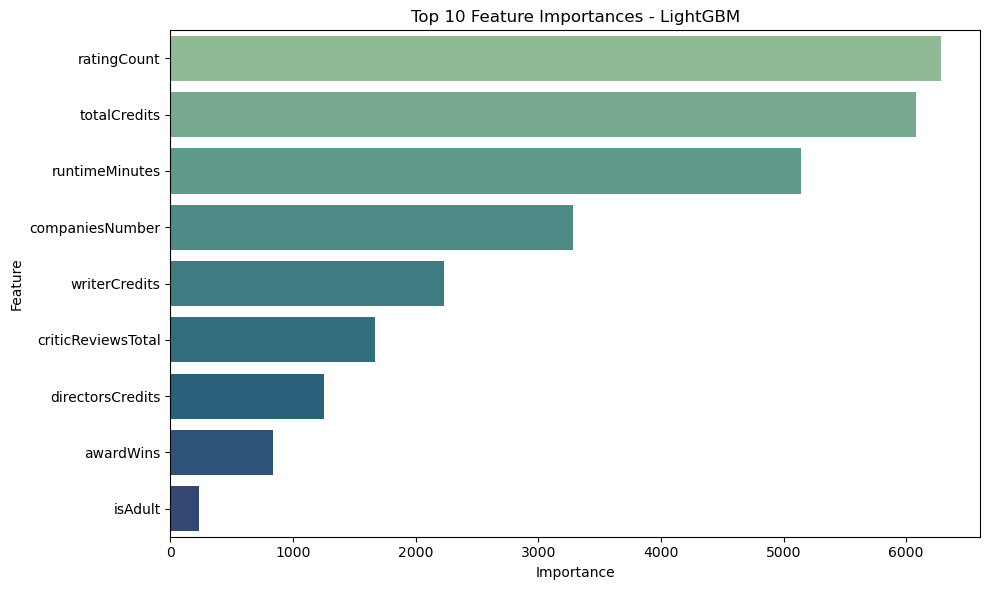

In [31]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1️⃣ Trajno modelin
lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)

# 2️⃣ Predikimet
y_pred = lgb_model.predict(X_test)
y_proba = lgb_model.predict_proba(X_test)

# 3️⃣ Classification report
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)
report_df = pd.DataFrame(report).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]

print("\n📋 Classification Report - LightGBM:")
print(report_df.round(2).to_string())

# 4️⃣ ROC Curve
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Rating {classes[i]} AUC={roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - LightGBM')
plt.grid(False)
plt.tight_layout()
plt.show()

# 6️⃣ Feature Importance
importance_df = pd.DataFrame({
    'Feature': df.drop(columns='rating').columns.tolist(),
    'Importance': lgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='crest')
plt.title('Top 10 Feature Importances - LightGBM')
plt.tight_layout()
plt.show()


In [35]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 13.5 MB/s eta 0:00:0000:0100:01


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📋 Classification Report - CatBoost:
              precision  recall  f1-score  support
1                  0.00    0.00      0.00     26.0
2                  0.00    0.00      0.00    142.0
3                  0.00    0.00      0.00    355.0
4                  0.00    0.00      0.00   1033.0
5                  0.35    0.01      0.03   2726.0
6                  0.34    0.13      0.19   6398.0
7                  0.32    0.39      0.36  11709.0
8                  0.42    0.78      0.55  14566.0
9                  0.62    0.02      0.04   6620.0
accuracy            NaN     NaN      0.39      NaN
macro avg          0.23    0.15      0.13  43575.0
weighted avg       0.39    0.39      0.31  43575.0


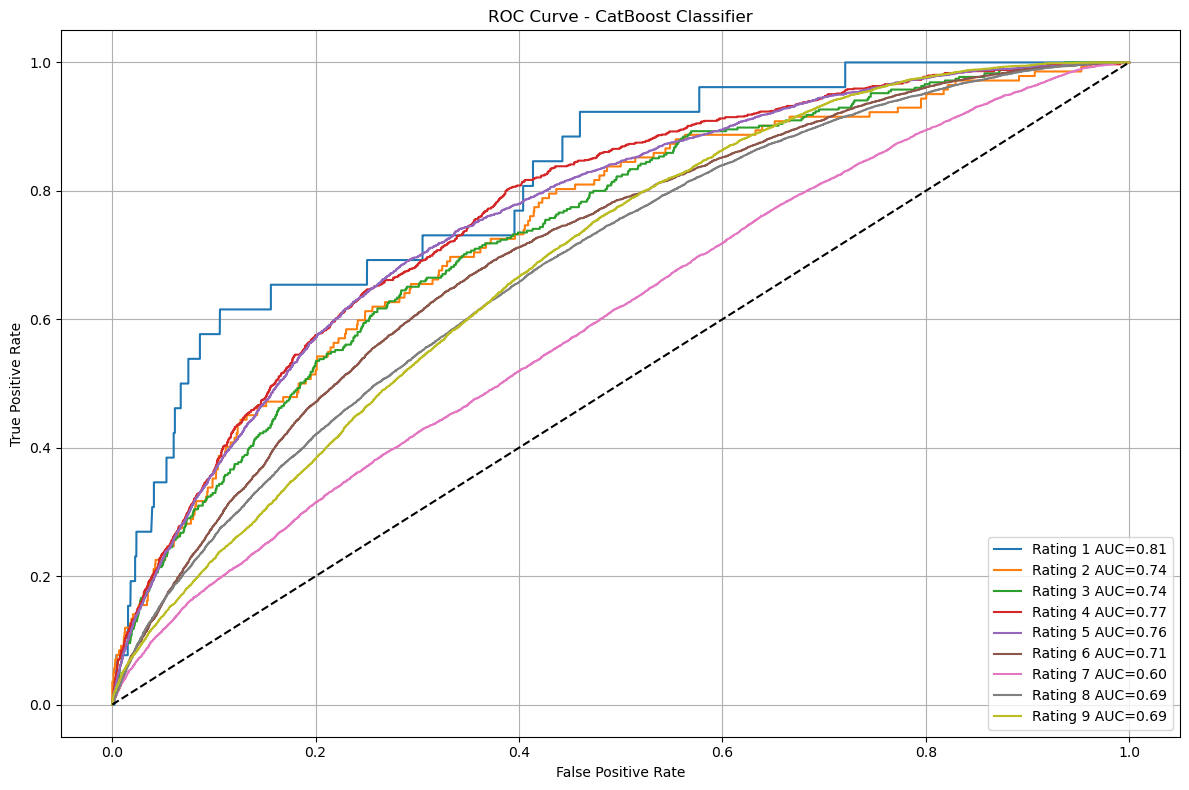

<Figure size 1000x800 with 0 Axes>

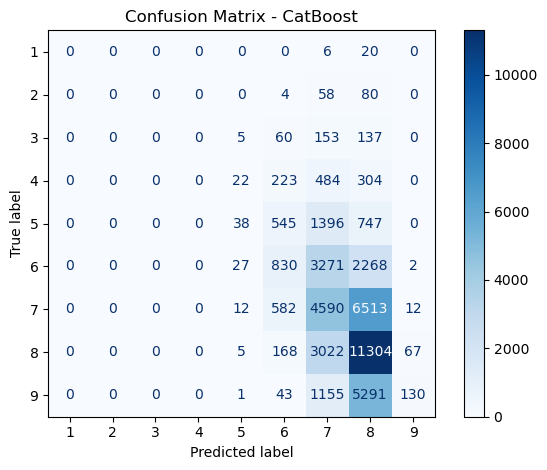

/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_63109/2812529440.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='rocket')


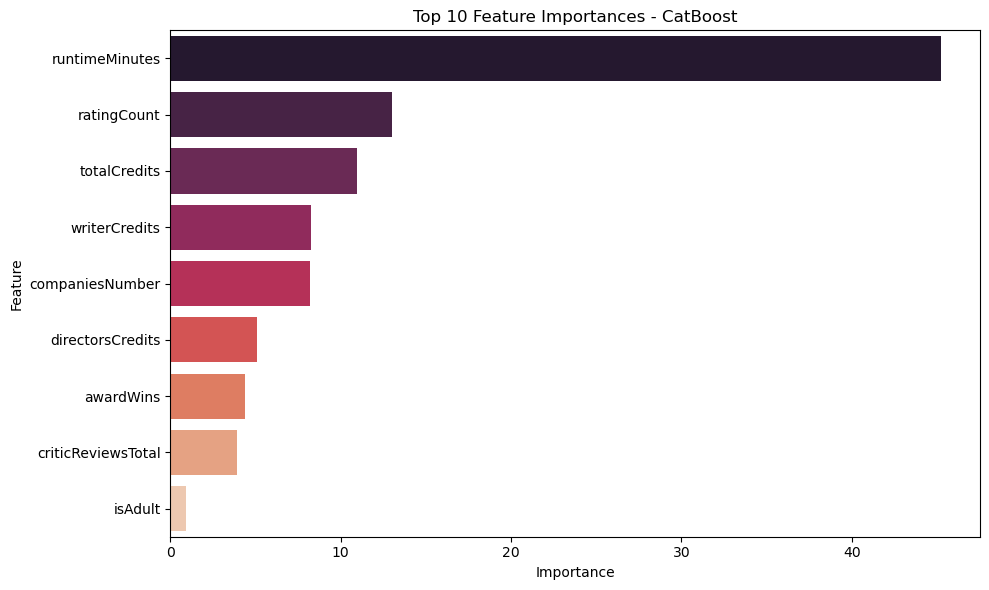

In [37]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1️⃣ Trajno modelin CatBoost
cat_model = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# 2️⃣ Predikimet
y_pred = cat_model.predict(X_test)
y_proba = cat_model.predict_proba(X_test)

# 3️⃣ Classification report
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)
report_df = pd.DataFrame(report).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]

print("\n📋 Classification Report - CatBoost:")
print(report_df.round(2).to_string())

# 4️⃣ ROC Curve për çdo klasë
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Rating {classes[i]} AUC={roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - CatBoost')
plt.grid(False)
plt.tight_layout()
plt.show()

# 6️⃣ Feature Importance
importance_df = pd.DataFrame({
    'Feature': df.drop(columns='rating').columns.tolist(),
    'Importance': cat_model.get_feature_importance()
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='rocket')
plt.title('Top 10 Feature Importances - CatBoost')
plt.tight_layout()
plt.show()


In [39]:
!pip install xgboost


  Using cached xgboost-3.0.0-py3-none-macosx_10_15_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-macosx_10_15_x86_64.whl (2.2 MB)


In [47]:
# Kontrollo klasat në të dy ndarjet
print("Klasat në y_train:", np.unique(y_train))
print("Klasat në y_test:", np.unique(y_test))


Klasat në y_train: [1 2 3 4 5 6 7 8 9]
Klasat në y_test: [1 2 3 4 5 6 7 8 9]


In [49]:
from sklearn.model_selection import train_test_split

# Bëj stratifikim sipas y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [63]:
print("Klasat në df['rating']:", sorted(df['rating'].unique()))


Klasat në df['rating']: [1, 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['rating'])  # rikodifikon klasat në 0–8


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:56:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📋 Classification Report - XGBoost:
              precision  recall  f1-score  support
0                  0.29    0.08      0.12     26.0
1                  0.62    0.04      0.07    142.0
2                  0.60    0.01      0.02    355.0
3                  0.22    0.02      0.03   1033.0
4                  0.33    0.07      0.12   2726.0
5                  0.33    0.21      0.26   6398.0
6                  0.35    0.36      0.35  11709.0
7                  0.43    0.75      0.55  14566.0
8                  0.40    0.07      0.12   6620.0
accuracy            NaN     NaN      0.39      NaN
macro avg          0.40    0.18      0.18  43575.0
weighted avg       0.38    0.39      0.34  43575.0


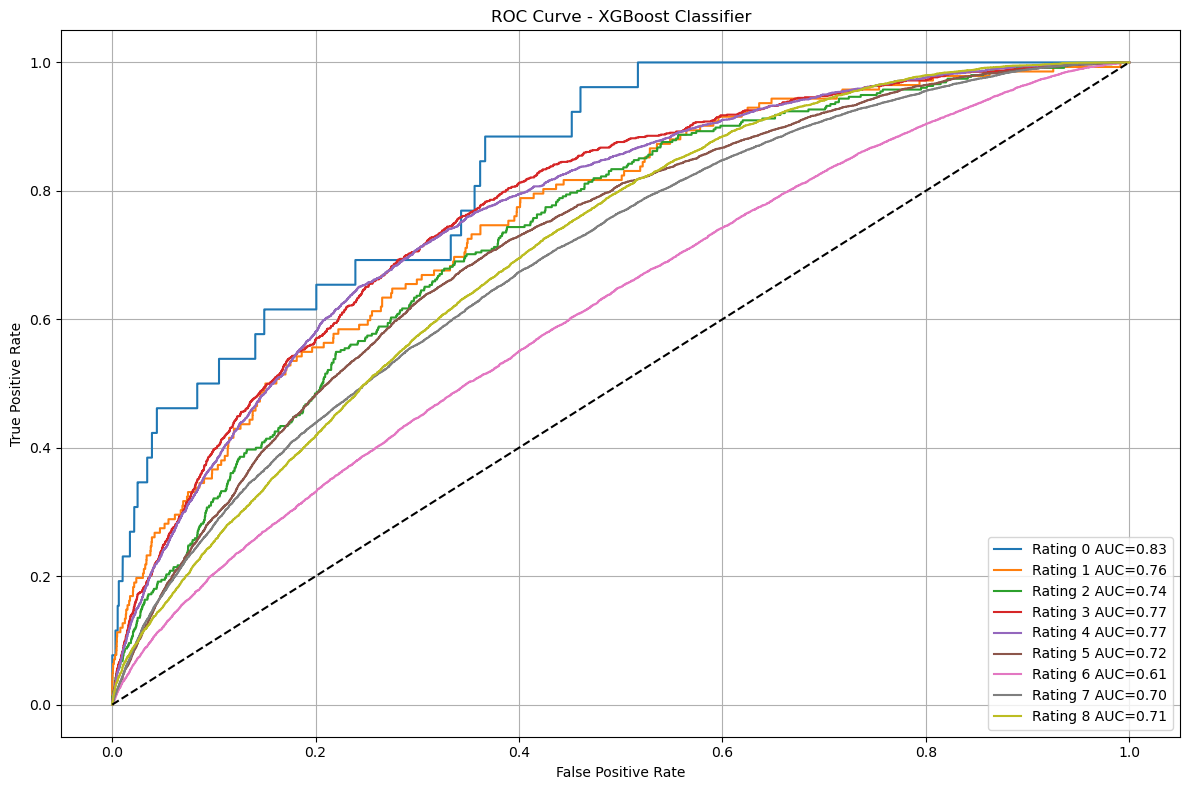

<Figure size 1000x800 with 0 Axes>

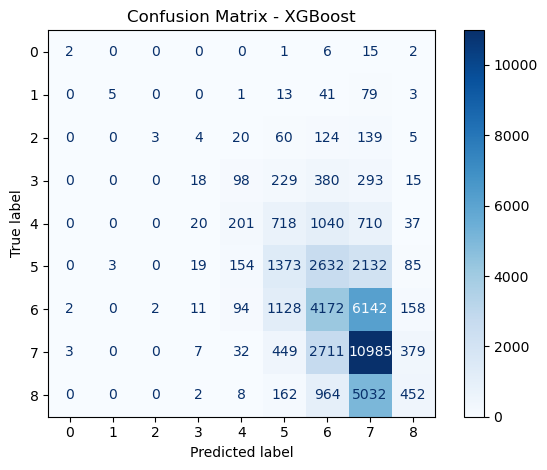

/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_67514/1170450825.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='flare')


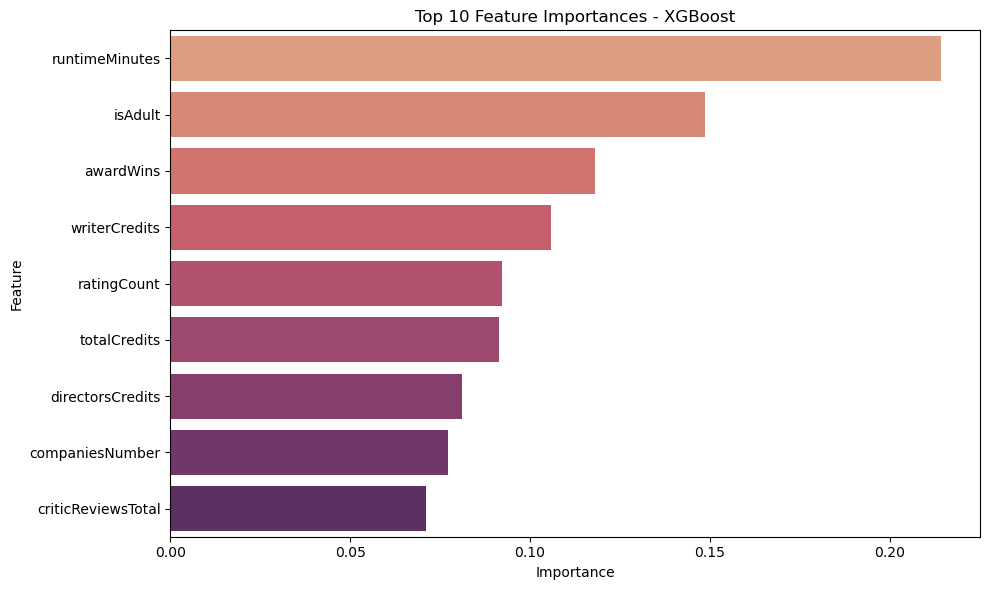

In [7]:
# 0️⃣ Instalimi nëse nuk e ke
# !pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Bëj ndarjen me stratifikim
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

xgb_model = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train, y_train)


# 2️⃣ Predikimet
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)

# 3️⃣ Classification report
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)
report_df = pd.DataFrame(report).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]

print("\n📋 Classification Report - XGBoost:")
print(report_df.round(2).to_string())

# 4️⃣ ROC Curve për klasat
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Rating {classes[i]} AUC={roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - XGBoost')
plt.grid(False)
plt.tight_layout()
plt.show()

# 6️⃣ Feature Importance
importance_df = pd.DataFrame({
    'Feature': df.drop(columns='rating').columns.tolist(),
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='flare')
plt.title('Top 10 Feature Importances - XGBoost')
plt.tight_layout()
plt.show()


In [43]:
from sklearn.model_selection import train_test_split

# zëvendëso ndarjen që ke aktualisht me këtë
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📋 Classification Report - MLP Neural Network:
              precision  recall  f1-score  support
0                  0.00    0.00      0.00     26.0
1                  0.00    0.00      0.00    142.0
2                  0.00    0.00      0.00    355.0
3                  0.14    0.00      0.01   1033.0
4                  0.30    0.01      0.02   2726.0
5                  0.29    0.24      0.26   6398.0
6                  0.32    0.33      0.32  11709.0
7                  0.42    0.75      0.54  14566.0
8                  0.23    0.01      0.02   6620.0
accuracy            NaN     NaN      0.37      NaN
macro avg          0.19    0.15      0.13  43575.0
weighted avg       0.33    0.37      0.31  43575.0


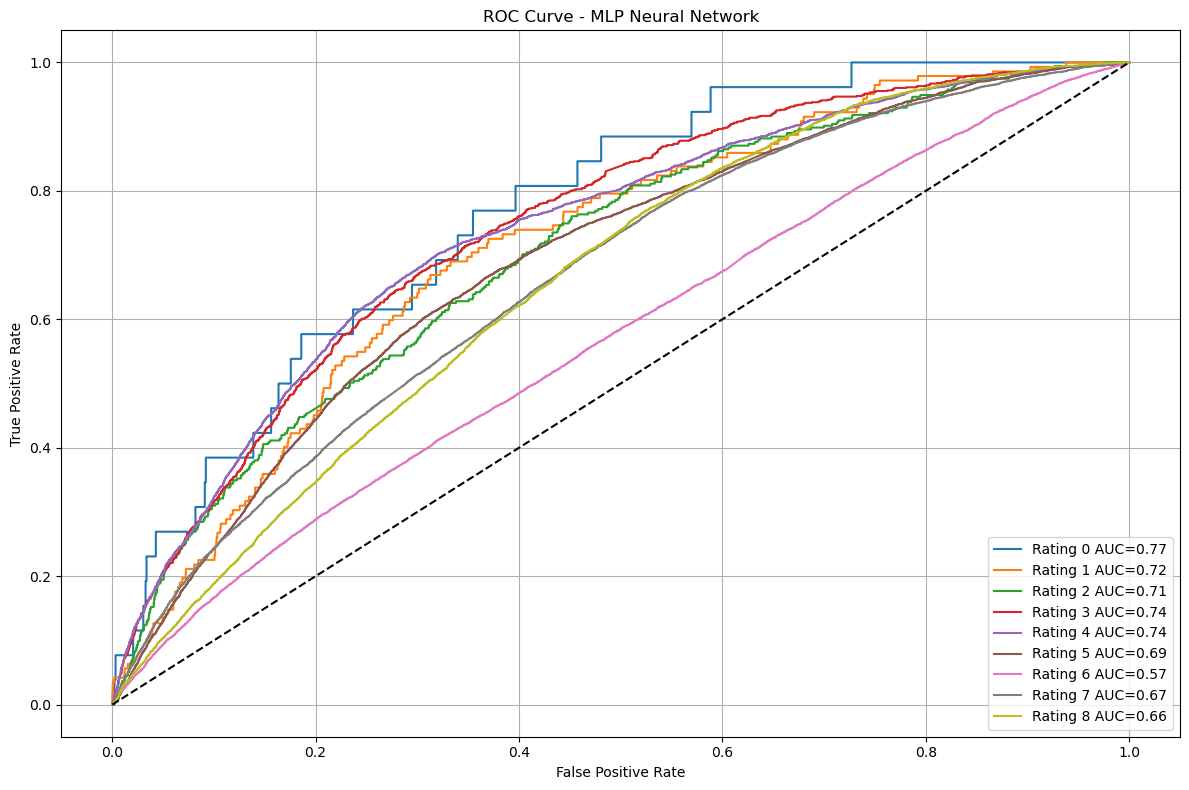

<Figure size 1000x800 with 0 Axes>

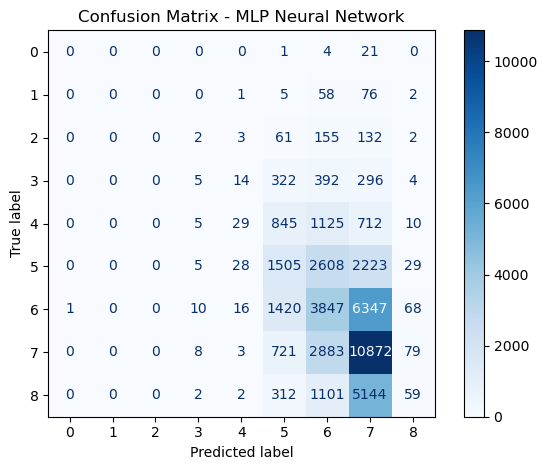

In [71]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# 1️⃣ Trajno modelin me konfigurim të mirë default
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

# 2️⃣ Predikimet
y_pred = mlp_model.predict(X_test)
y_proba = mlp_model.predict_proba(X_test)

# 3️⃣ Classification report
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)
report_df = pd.DataFrame(report).T[['precision', 'recall', 'f1-score', 'support']]
report_df.loc['accuracy'] = [None, None, accuracy, None]
print("\n📋 Classification Report - MLP Neural Network:")
print(report_df.round(2).to_string())

# 4️⃣ ROC Curve
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Rating {classes[i]} AUC={roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - MLP Neural Network')
plt.grid(False)
plt.tight_layout()
plt.show()


In [77]:
!pip install lime


  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=32bee8875919a40293b9236ba1ee24e386c5bf262c0712a12ea1cf5b70e21206
  Stored in directory: /Users/elvislleshi/Library/Caches/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [83]:
# 1. Instalo LIME nëse nuk e ke
 
import lime
import lime.lime_tabular

# 1️⃣ Rikrijo X_test si DataFrame me emrat e saktë
feature_names = df.drop(columns='rating').columns.tolist()
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# 2️⃣ Zgjidh një indeks (sigurohu që nuk është më i madh se numri i rreshtave)
i = 25  # ose përdor i = 0 nëse s'je i sigurt

# 3️⃣ Apliko LIME
exp = explainer.explain_instance(
    data_row=X_test_df.iloc[i].values,  # merret si vektor
    predict_fn=xgb_model.predict_proba
)

# 4️⃣ Shfaq vizualizimin
exp.show_in_notebook(show_table=True, show_all=False)


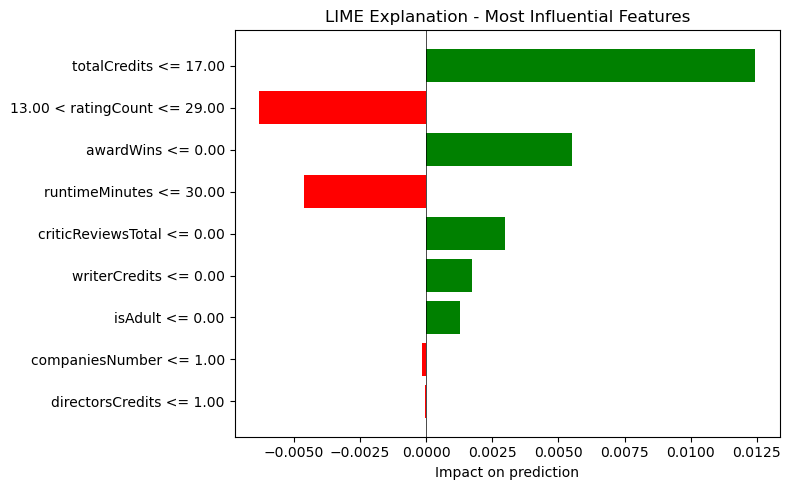

In [85]:
# 1️⃣ Merr shpjegimin si listë (veçoritë më të rëndësishme)
exp_list = exp.as_list()

# 2️⃣ Ndaj në veçori dhe rëndësi
features = [f[0] for f in exp_list]
values = [f[1] for f in exp_list]

# 3️⃣ Krijo grafik horizontal
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = plt.barh(features, values, color=['green' if v > 0 else 'red' for v in values])
plt.axvline(0, color='black', lw=0.5)
plt.xlabel('Impact on prediction')
plt.title('LIME Explanation - Most Influential Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


In [87]:
##import lime
import lime.lime_tabular

# 1️⃣ Krijo LIME explainer (vetëm 1 herë në notebook)
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_df.values,
    feature_names=feature_names,
    class_names=[str(i) for i in np.unique(y_train)],
    mode='classification'
)

# 2️⃣ Zgjidh një rresht për interpretim (kujdes me indeksin)
i = 10  # mund të ndryshosh indeksin

# 3️⃣ Shpjego me LIME për MLP
exp = explainer.explain_instance(
    data_row=X_test_df.iloc[i].values,
    predict_fn=mlp_model.predict_proba  # ndryshimi këtu!
)

# 4️⃣ Vizualizim
exp.show_in_notebook(show_table=True, show_all=False)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


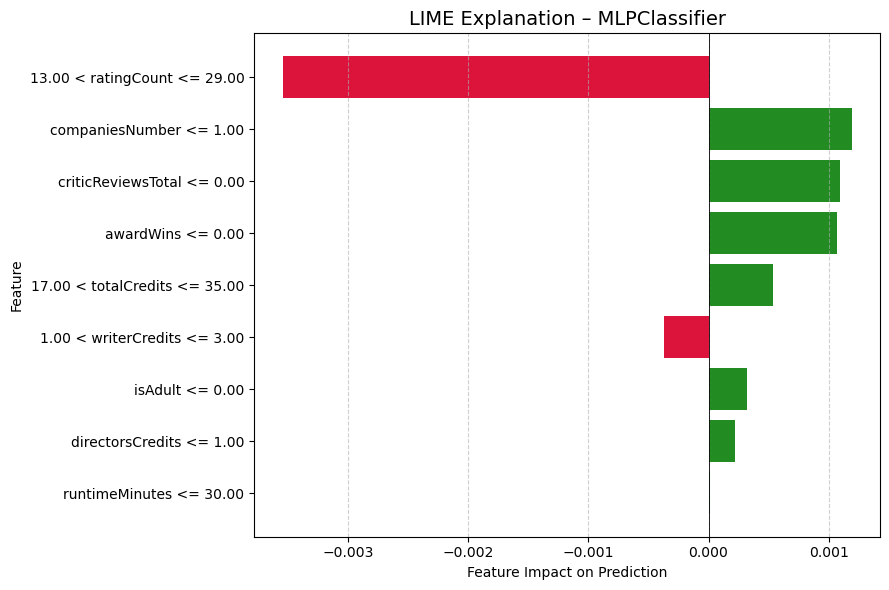

In [89]:
import matplotlib.pyplot as plt

# 1️⃣ Merr rezultatet nga LIME (pas exp = explainer.explain_instance(...))
exp_list = exp.as_list()  # kjo vjen direkt nga LIME

# 2️⃣ Ndaj në veçori dhe vlera
features = [f[0] for f in exp_list]
weights = [f[1] for f in exp_list]

# 3️⃣ Grafik i pastër horizontal
plt.figure(figsize=(9, 6))
colors = ['forestgreen' if val > 0 else 'crimson' for val in weights]
bars = plt.barh(features, weights, color=colors)

plt.axvline(0, color='black', linewidth=0.6)
plt.title('LIME Explanation – MLPClassifier', fontsize=14)
plt.xlabel('Feature Impact on Prediction')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [91]:
!pip install shap


  Using cached shap-0.47.2-cp312-cp312-macosx_10_9_x86_64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
Using cached shap-0.47.2-cp312-cp312-macosx_10_9_x86_64.whl (554 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)


 99%|===================| 1785/1800 [00:33<00:00]        

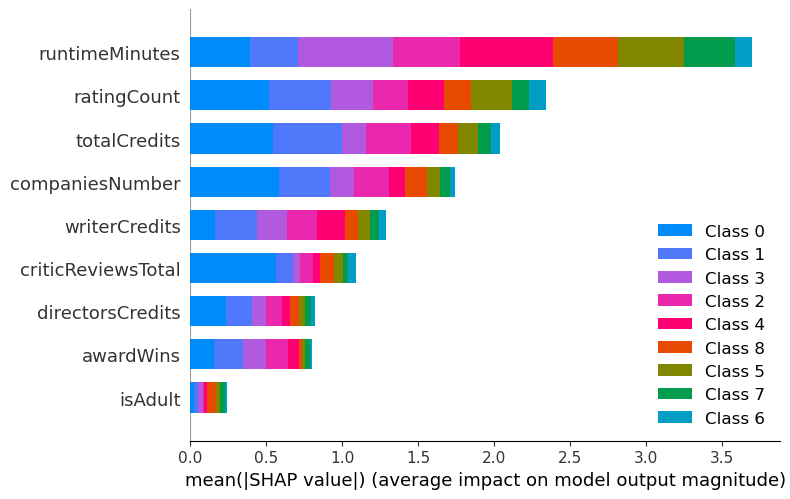

In [9]:
import shap

# 1️⃣ Sample një subset të vogël për shpejtësi
X_sample = shap.sample(X_test, 200, random_state=42)

# 2️⃣ Përdor explainer të optimizuar për XGBoost
explainer = shap.Explainer(xgb_model, X_sample)

# 3️⃣ Llogarit shap values për subset
shap_values = explainer(X_sample)

# 4️⃣ Vizualizo summary plot (global)
shap.summary_plot(
    shap_values,
    X_sample,
    feature_names=df.drop(columns='rating').columns.tolist()
)


100%|===================| 1796/1800 [00:34<00:00]        

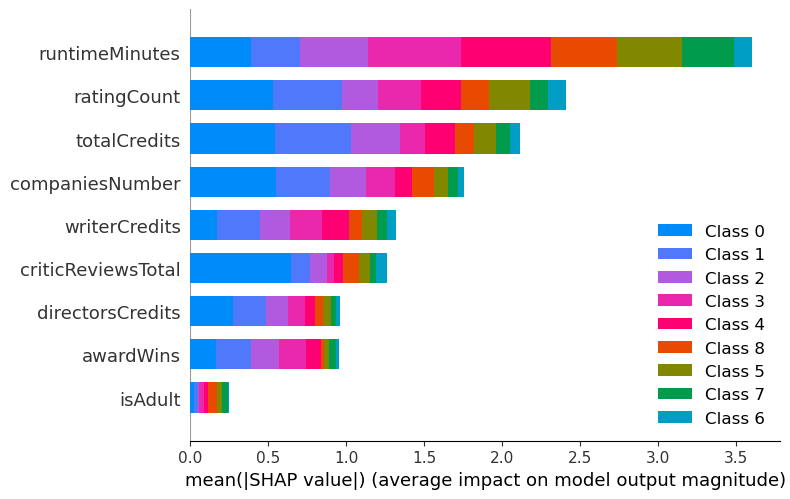

In [11]:
import shap

# 1️⃣ Krijo SHAP explainer i shpejtë për XGBoost
explainer = shap.Explainer(xgb_model, X_train)

# 2️⃣ Llogarit SHAP values për subset ose gjithë testin
shap_values = explainer(shap.sample(X_test, 200, random_state=42))  # më i shpejtë dhe mjaftueshëm për raport

# 3️⃣ Vizato Summary Plot – Global Feature Impact
shap.summary_plot(
    shap_values,
    shap.sample(X_test, 200, random_state=42),
    feature_names=df.drop(columns='rating').columns.tolist()
)
 

In [19]:
import shap
import matplotlib.pyplot as plt

# 1️⃣ Merr një subset për efikasitet
X_subset = shap.sample(X_test, 100, random_state=42)

# 2️⃣ Krijo SHAP explainer për modelin tënd (p.sh. xgb_model)
explainer = shap.Explainer(xgb_model, X_train)

# 3️⃣ Llogarit SHAP values për subsetin
shap_values = explainer(X_subset)

# 4️⃣ Zgjidh një indeks për një rresht të vetëm
i = 6  # ose çdo indeks tjetër
instance = X_subset.iloc[i]


# 5️⃣ Force Plot për klasën 0 (ose klasën më të parashikuar)
class_idx = 0

shap.initjs()  # për vizualizim interaktiv në Jupyter
shap.force_plot(
    base_value=explainer.expected_value[class_idx],
    shap_values=shap_values[class_idx][i].values,
    features=instance,
    feature_names=df.drop(columns='rating').columns.tolist()
)


 98%|===================| 884/900 [00:17<00:00]        

In [31]:
import shap
import matplotlib.pyplot as plt

# 1️⃣ Merr një subset për efikasitet
X_subset = shap.sample(X_test, 200, random_state=42)

# 2️⃣ Krijo SHAP explainer për modelin tënd (p.sh. xgb_model)
explainer = shap.Explainer(xgb_model, X_train)

# 3️⃣ Llogarit SHAP values për subsetin
shap_values = explainer(X_subset)

# 4️⃣ Zgjidh një indeks për një rresht të vetëm
i = 4  # ose çdo indeks tjetër
instance = X_subset.iloc[i]


# 5️⃣ Force Plot për klasën 0 (ose klasën më të parashikuar)
class_idx = 0

shap.initjs()  # për vizualizim interaktiv në Jupyter
shap.force_plot(
    base_value=explainer.expected_value[class_idx],
    shap_values=shap_values[class_idx][i].values,
    features=instance,
    feature_names=df.drop(columns='rating').columns.tolist()
)


 97%|=================== | 1753/1800 [00:34<00:00]       

IndexError: index 7 is out of bounds for axis 0 with size 1